In [159]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as mp3d
import math
import os
from io import BytesIO

In [160]:
def thresh_sample(v):
    m,s = v.mean(),v.std().apply(lambda x:.23*math.sqrt(x))
    tm,tM = m-s,m+s
    trunc_m = v[ v.apply(lambda x: x>tM,axis=1).sum(axis=1)!= 0]
    trunc_M = v[ v.apply(lambda x: x<tm,axis=1).sum(axis=1)!= 0]
    m_ind = min(trunc_m.index[0],trunc_M.index[0])
    M_ind = max(trunc_m.index[-1],trunc_M.index[-1])
    return v.ix[m_ind:M_ind,:]

  
def normalize(v):
    def toax(a):
        xd = a.index
        xd = xd/float(xd[-1])*100
        return np.interp(range(100),xd,a)
    df = pd.DataFrame([ toax(v[a]) for a in v.columns ] ).T
    df.columns = ['x','y','z']
    return df


In [161]:
filelist = [ x for x in os.listdir('./') if '.txt' in x ]

In [199]:
D = dict()
l_d = len(D)
for f in filelist:
    with open(f) as fh:
        s = ''.join([ x for x in fh if (x[0]!='#' and x[0]!='\n')])
        D[f] = pd.read_csv(BytesIO(s),sep=' ',names=['x','y','z','v'],usecols=['x','y','z'])
        D[f] = thresh_sample(D[f]).reset_index(drop=True)
        D[f] = normalize(D[f])
        

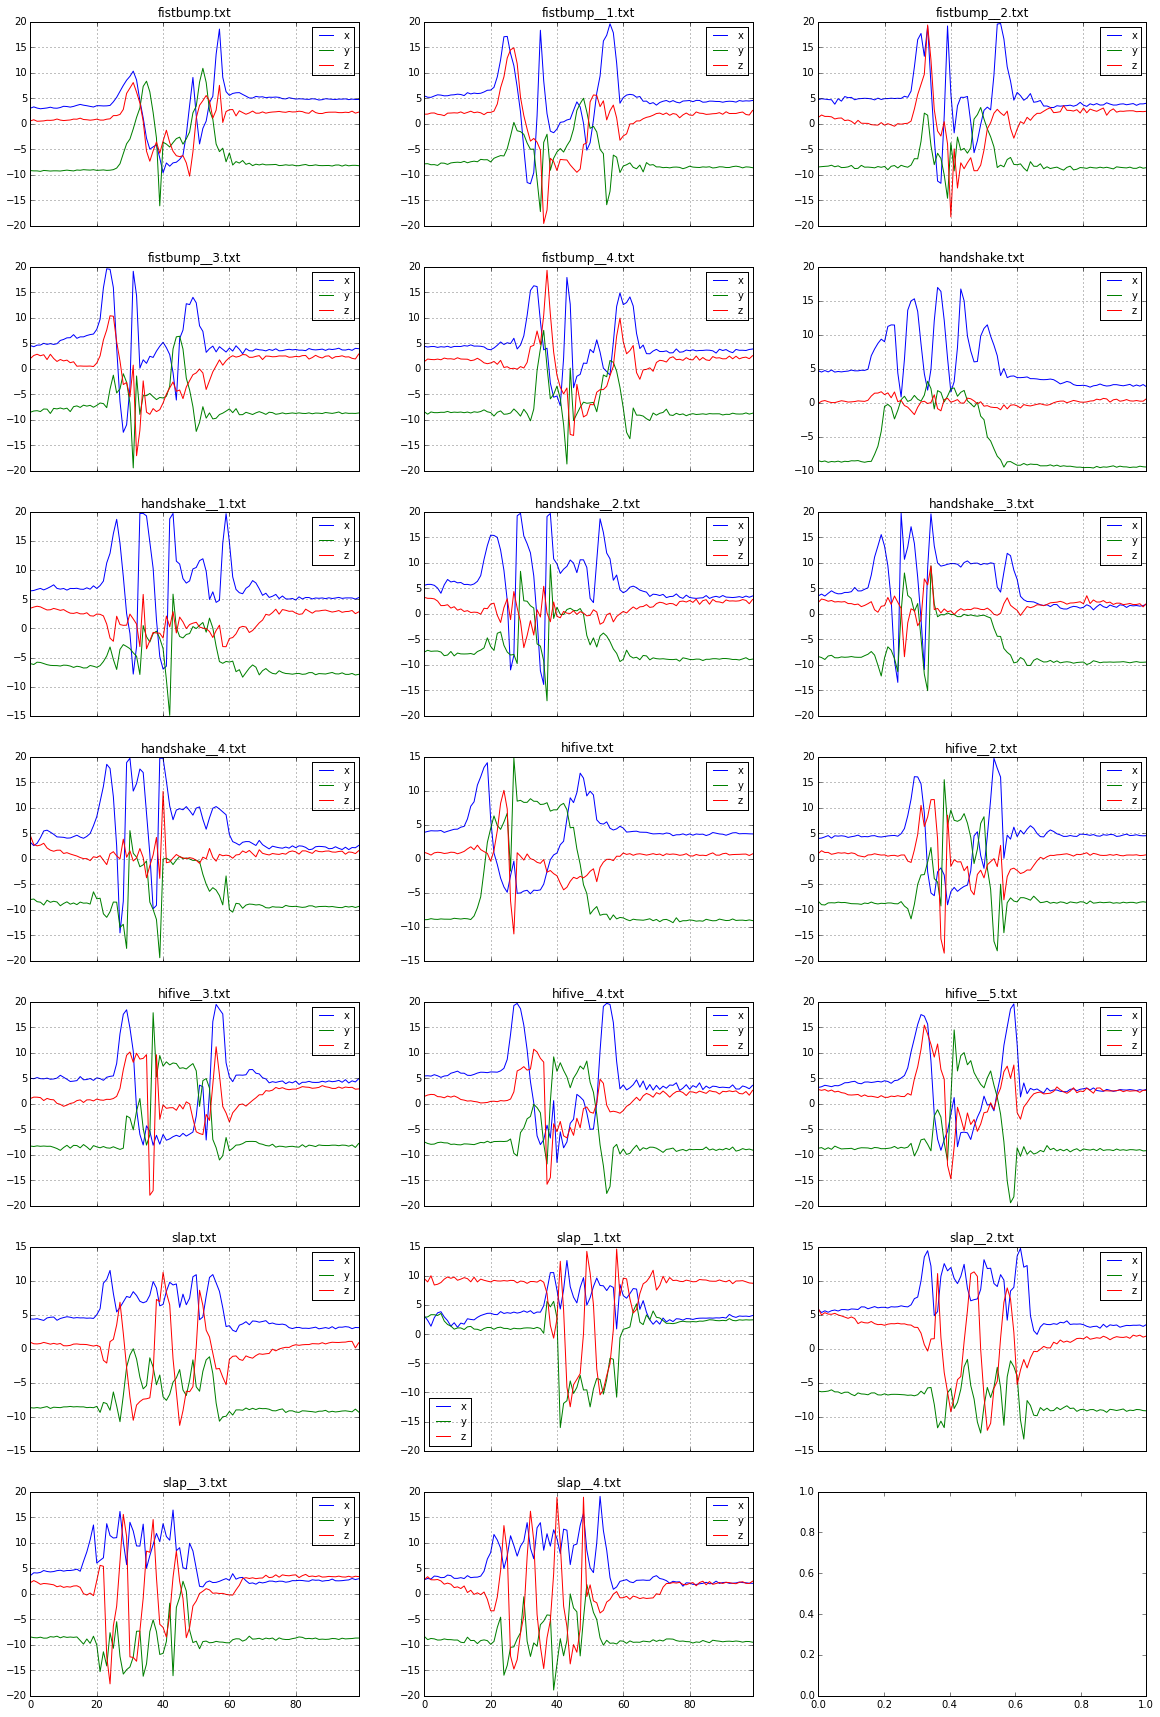

In [200]:
fig, axes = plt.subplots(nrows=7, ncols=3,figsize=(20,30))
for i,(k,v) in enumerate(sorted(D.items())):
    v.plot(title=k,ax=axes[i/3,i%3])

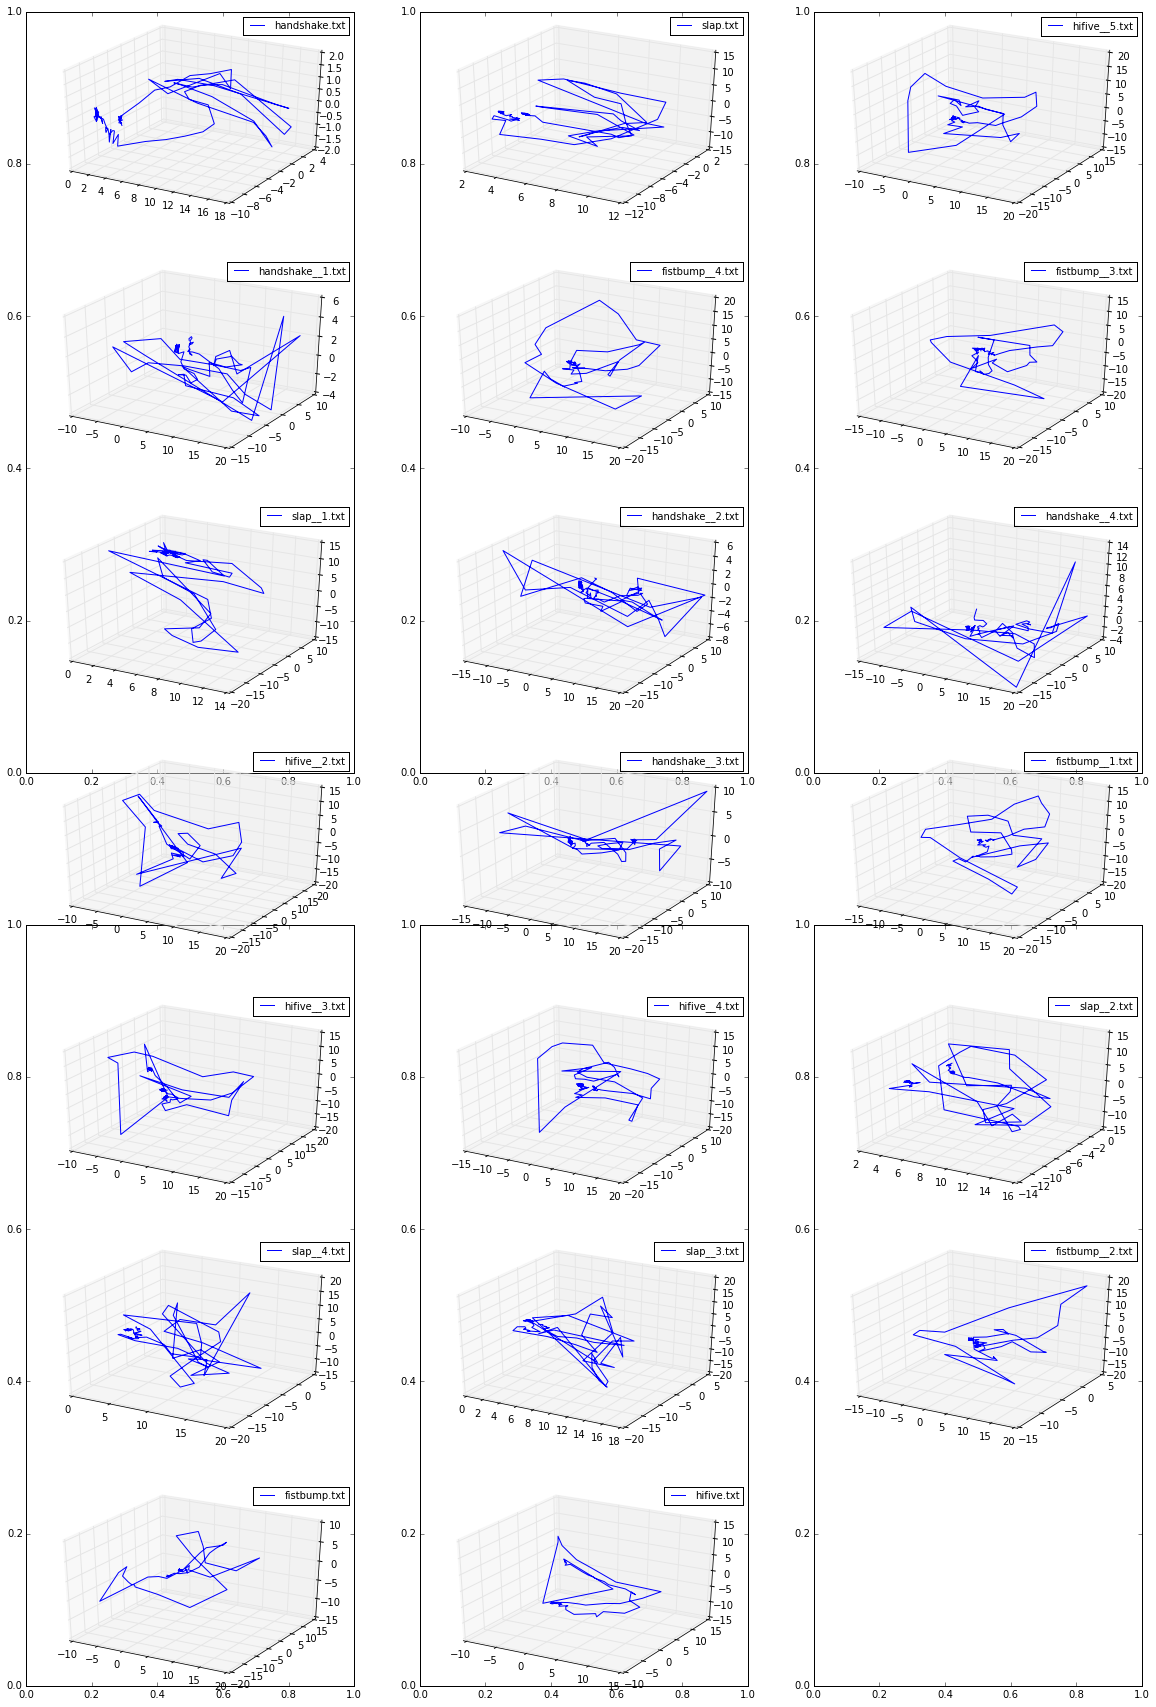

In [321]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


mpl.rcParams['legend.fontsize'] = 10

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,30))

for i,(k,v) in enumerate(D.items()):
    ax = fig.add_subplot(7,3,i+1,projection='3d')
    ax.plot(v['x'],v['y'],v['z'], label=k)
    ax.legend()


plt.show()

In [265]:
DFT = dict()
DFTph = dict()
for k,v in D.items():
    DFT[k] = v.apply(np.fft.fft,axis=0)#.applymap(np.absolute)
    

x              y            z
0   356986.799846  374991.258489  1251.220221
1    29259.596440   49548.789153  1511.869576
2     1576.738969   10789.355984    53.305896
3     1113.835646     802.167716   182.029592
4     1191.432778     852.560372   406.188105
5      353.776034    1259.016154   282.940765
6      859.551299     207.688041   100.557952
7      409.589317     821.346744   161.931050
8     1401.548825     901.336648   197.260252
9     2563.658074     452.352885   107.709336
10    1860.619797     615.412177    35.034893
11    5708.664158     468.066535    63.577950
12   11132.745275     178.034531   135.439866
13   10843.574402     577.684753   115.734981
14    6004.737359     422.191447    65.278041
15    1324.040803     103.920159    54.039550
16     374.850893      23.726007    19.359881
17     132.807763      21.332365     6.273878
18     376.972980     151.782215     6.589639
19    1894.976007     152.585289     6.862501
20    1592.039705      62.803423     6.679727
21    1009.005568     223.586623    15.861763
22     594.634217     139.936403    29.943228
23     913.431350      75.721097     6.430624
24    1022.740091     203.897944    26.527757
25     781.771070     226.852949   117.100309
26     477.135896     135.968628   102.215946
27     101.537197      73.268461    79.556754
28      27.100672      79.154316    89.475014
29     185.809704      59.255096    67.226518
..            ...            ...          ...
70     346.002471     104.125462    29.391123
71     185.809704      59.255096    67.226518
72      27.100672      79.154316    89.475014
73     101.537197      73.268461    79.556754
74     477.135896     135.968628   102.215946
75     781.771070     226.852949   117.100309
76    1022.740091     203.897944    26.527757
77     913.431350      75.721097     6.430624
78     594.634217     139.936403    29.943228
79    1009.005568     223.586623    15.861763
80    1592.039705      62.803423     6.679727
81    1894.976007     152.585289     6.862501
82     376.972980     151.782215     6.589639
83     132.807763      21.332365     6.273878
84     374.850893      23.726007    19.359881
85    1324.040803     103.920159    54.039550
86    6004.737359     422.191447    65.278041
87   10843.574402     577.684753   115.734981
88   11132.745275     178.034531   135.439866
89    5708.664158     468.066535    63.577950
90    1860.619797     615.412177    35.034893
91    2563.658074     452.352885   107.709336
92    1401.548825     901.336648   197.260252
93     409.589317     821.346744   161.931050
94     859.551299     207.688041   100.557952
95     353.776034    1259.016154   282.940765
96    1191.432778     852.560372   406.188105
97    1113.835646     802.167716   182.029592
98    1576.738969   10789.355984    53.305896
99   29259.596440   49548.789153  1511.869576

[100 rows x 3 columns]

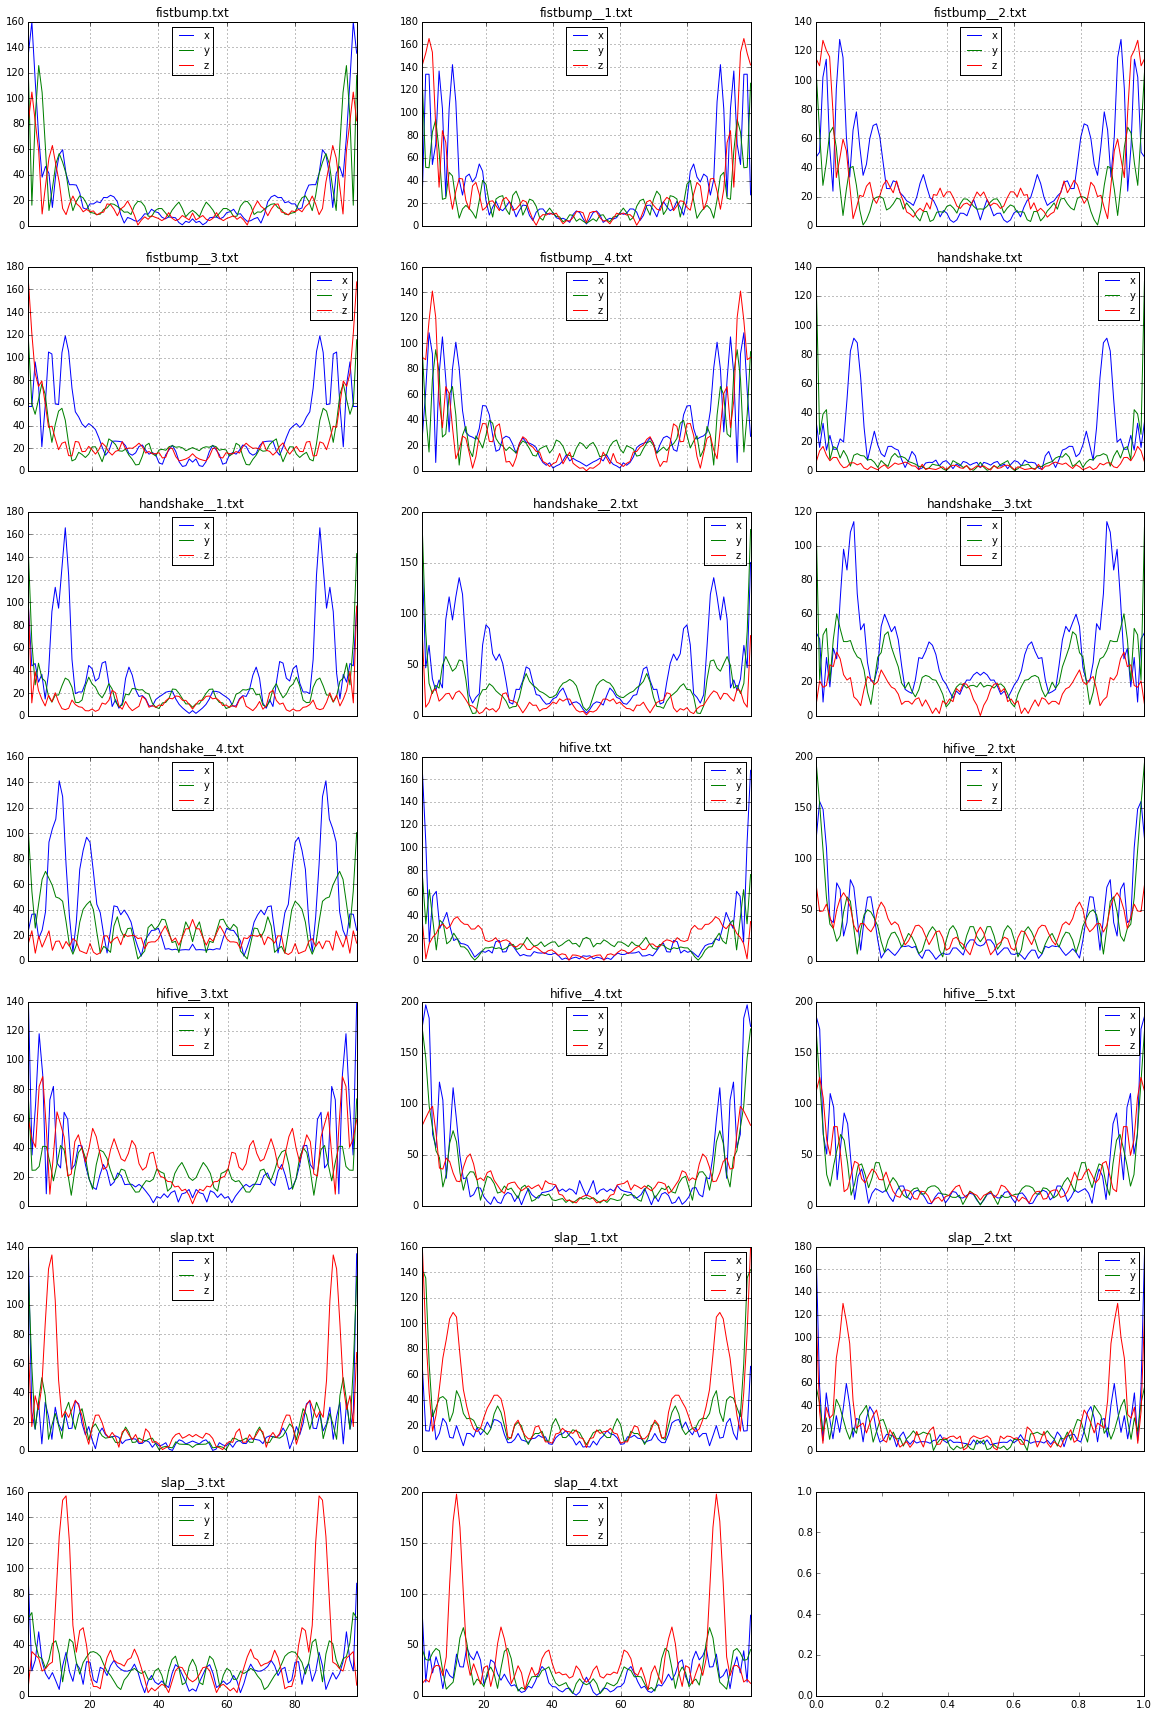

In [261]:
fig, axes = plt.subplots(nrows=7, ncols=3,figsize=(20,30))
for i,(k,v) in enumerate(sorted(DFT.items())):
    v[(v>200).sum(axis=1)==0].plot(title=k,ax=axes[i/3,i%3])
    #v.plot(title=k,ax=axes[i/3,i%3])
    

In [292]:
from scipy.integrate import simps

aucdict = dict()
for i1,(k1,v1) in enumerate(sorted(DFT.items())):
    for i2,(k2,v2) in enumerate(sorted(DFT.items())):
        if i2 <= i1:
            aucdict[(k1,k2)] = (v1*v2).applymap(np.absolute).apply(lambda x:simps(x,dx=100),axis=0).sum()
            

In [294]:
M = max( aucdict.values())
for w in sorted(aucdict, key=aucdict.get, reverse=True):
  print w, aucdict[w]/M

('hifive__3.txt', 'hifive__3.txt') 1.0
('hifive__5.txt', 'hifive__5.txt') 0.986644226906
('hifive__4.txt', 'hifive__4.txt') 0.961647701661
('hifive__5.txt', 'hifive__4.txt') 0.94721441844
('slap__4.txt', 'slap__4.txt') 0.944010097006
('hifive__5.txt', 'hifive__3.txt') 0.916759905664
('hifive__4.txt', 'hifive__3.txt') 0.914360227265
('fistbump__1.txt', 'fistbump__1.txt') 0.899569060088
('hifive__2.txt', 'hifive__2.txt') 0.897569510936
('slap__3.txt', 'slap__3.txt') 0.876707801153
('hifive__5.txt', 'hifive__2.txt') 0.872682164312
('hifive__4.txt', 'hifive__2.txt') 0.869293592883
('hifive__3.txt', 'hifive__2.txt') 0.868788567558
('slap__4.txt', 'slap__3.txt') 0.865998256257
('handshake__4.txt', 'handshake__4.txt') 0.849596159607
('fistbump__2.txt', 'fistbump__2.txt') 0.806751865421
('hifive__5.txt', 'fistbump__1.txt') 0.804771362929
('hifive__4.txt', 'fistbump__1.txt') 0.802358775504
('handshake__2.txt', 'handshake__2.txt') 0.795421806313
('hifive__3.txt', 'hifive.txt') 0.783354277113
('h

IndexError: index 70 is out of bounds for axis 0 with size 70

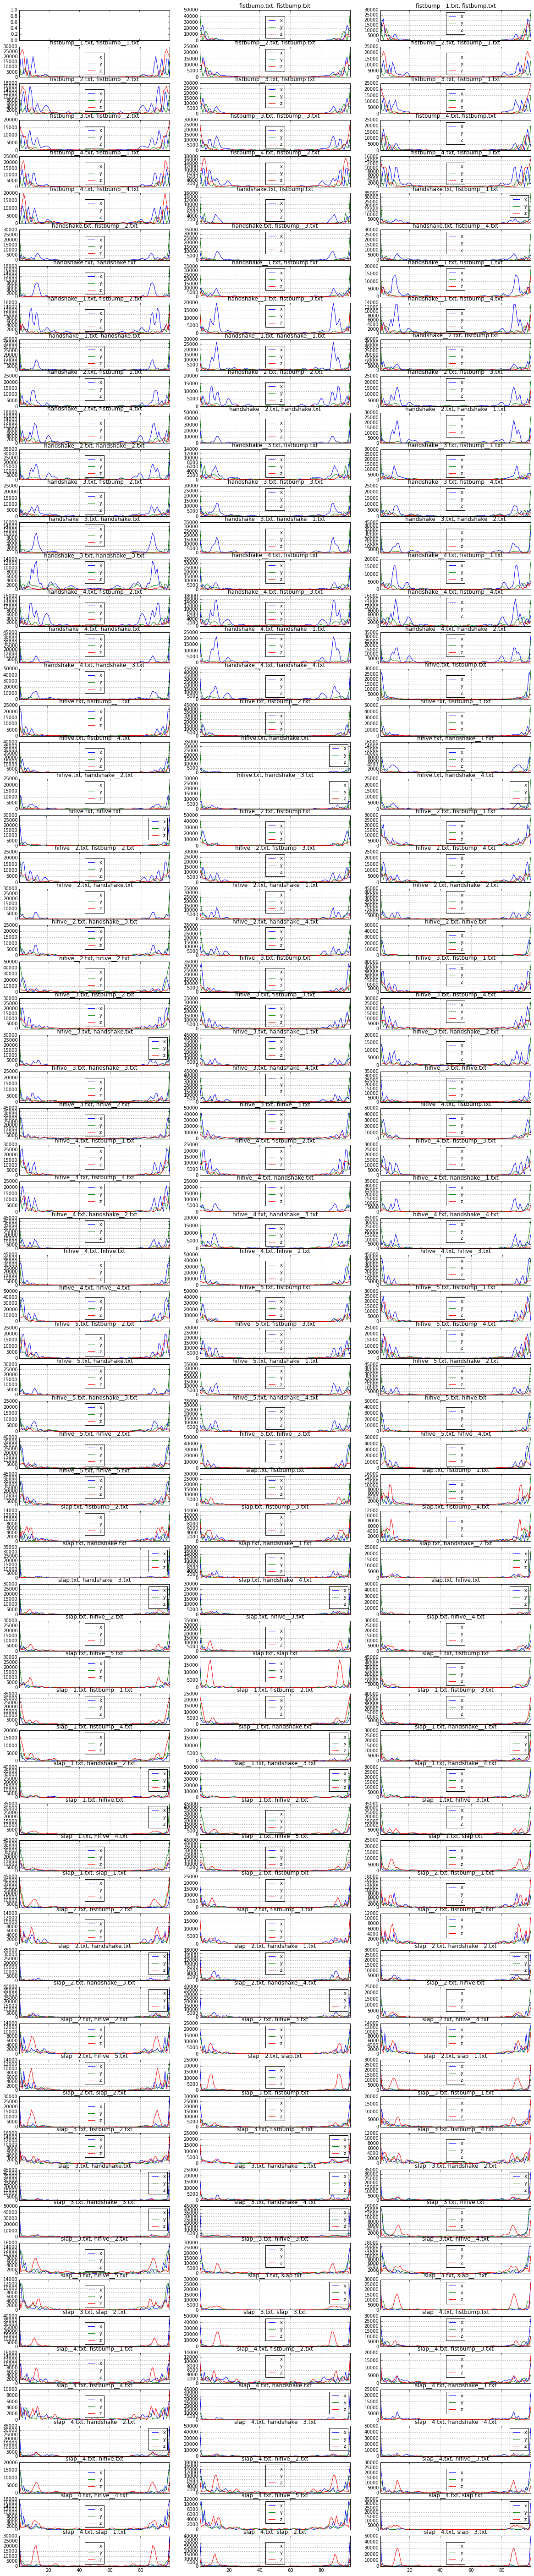

In [320]:
fig, axes = plt.subplots(nrows=70, ncols=3,figsize=(20,100))
i=0
for i1,(k1,v1) in enumerate(sorted(DFT.items())):
    for i2,(k2,v2) in enumerate(sorted(DFT.items())):
        if i2 <= i1:
            i += 1
            title = "%s, %s" %(k1,k2)
            a = (v1*v2).applymap(np.absolute)
            a[(a>50000).sum(axis=1) == 0].plot(ax=axes[i/3,i%3],title=title)
            #pd.DataFrame(convolve_all(v1,v2)).plot(ax=axes[i/3,i%3],title=title)


